In [12]:
!pip install plotly

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pareto

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.dates as mdates

!pip install pyswarms #PSO Partical Swam Optimation
import pyswarms as ps #PSO
import numba #untuk GA

from sklearn import linear_model


from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from sklearn.preprocessing import Normalizer
from pyswarms.utils.functions import single_obj as fx #PSO
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface) #PSO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score #Utilitas
import plotly.express as px 

ERROR: Invalid requirement: '#PSO'


In [14]:
!pip install pyswarms

In [17]:
index_gabungan = pd.read_excel('C:\\Users\LENOVO\Project Data Science\indexgabungan.xlsx')
index_gabungan = index_gabungan.drop(['Unnamed: 0'], axis=1)
index_gabungan

Tanggal  Terkonfirmasi Positif(X1)  Angka Kematian(X2)  \
0  2021-08-09                        727                  13   
1  2021-08-10                       1425                  41   
2  2021-08-11                       1958                  42   
3  2021-08-12                       1078                  42   
4  2021-08-13                       1210                  68   
..        ...                        ...                 ...   
68 2021-10-16                        154                   1   
69 2021-10-17                        131                   0   
70 2021-10-18                        107                   1   
71 2021-10-19                        106                   0   
72 2021-10-20                        103                   0   

    Angka Kesembuhan(X3)  Jumlah Kasus Aktif(X4)  Status Perawatan(X5)  \
0                   1000                   10356                  7430   
1                   1221                   10519                  7495   
2                   1334                   11101                  7873   
3                   2256                    9881                  7008   
4                   1570                    9453                  6724   
..                   ...                     ...                   ...   
68                   220                    1342                   992   
69                   127                    1346                   998   
70                   138                    1314                   984   
71                   122                    1298                   967   
72                   142                    1259                   947   

    Isolasi Pasien(X6)  Jumlah Vaksinasi Harian(X7)  \
0                 2926                       253127   
1                 3024                       261013   
2                 3228                       205705   
3                 2873                        85337   
4                 2729                       276877   
..                 ...                          ...   
68                 350                        44856   
69                 348                        21254   
70                 330                        10615   
71                 331                        38656   
72                 312                            0   

    retail and recreation(X8)  grocery and pharmacy(X9)  parks(X10)  \
0                         -32                        -2         -50   
1                         -35                        -6         -55   
2                         -34                        -5         -51   
3                         -30                        -3         -50   
4                         -29                        -1         -45   
..                        ...                       ...         ...   
68                        -15                         8         -32   
69                        -18                         3         -38   
70                        -27                       -10         -46   
71                        -16                         5         -35   
72                        -14                         2         -19   

    transit station(X11)  workplace(X12)  residential(X13)  \
0                    -50             -40                15   
1                    -51             -42                16   
2                    -60             -67                22   
3                    -48             -37                14   
4                    -48             -36                16   
..                   ...             ...               ...   
68                   -23             -16                 5   
69                   -26             -12                 5   
70                   -36             -31                12   
71                   -30             -32                 9   
72                   -44             -65                17   

    IHSG ADJ Close(X14)  IDR To USD ADJ Close(X15)  BOR COVID 19(X16)  \
0           6127

In [18]:
col = ['date','positif','kematian','kesembuhan','aktif','perawatan','isolasi',
              'vaksin_lengkap','retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi','ihsg_closed','idr_closed','bor_covid','bor_tt_covid','bor_tt_isoman',
              'bor_tt_intensif']

index_gabungan.columns = col

In [19]:
index_gabungan = index_gabungan.drop(columns = [
    'aktif',
'perawatan',
'isolasi'])

In [20]:
index_gabungan

date  positif  kematian  kesembuhan  vaksin_lengkap  \
0  2021-08-09      727        13        1000          253127   
1  2021-08-10     1425        41        1221          261013   
2  2021-08-11     1958        42        1334          205705   
3  2021-08-12     1078        42        2256           85337   
4  2021-08-13     1210        68        1570          276877   
..        ...      ...       ...         ...             ...   
68 2021-10-16      154         1         220           44856   
69 2021-10-17      131         0         127           21254   
70 2021-10-18      107         1         138           10615   
71 2021-10-19      106         0         122           38656   
72 2021-10-20      103         0         142               0   

    retail_recreation  grocery_pharm  parks  station  workplace  residensi  \
0                 -32             -2    -50      -50        -40         15   
1                 -35             -6    -55      -51        -42         16   
2                 -34             -5    -51      -60        -67         22   
3                 -30             -3    -50      -48        -37         14   
4                 -29             -1    -45      -48        -36         16   
..                ...            ...    ...      ...        ...        ...   
68                -15              8    -32      -23        -16          5   
69                -18              3    -38      -26        -12          5   
70                -27            -10    -46      -36        -31         12   
71                -16              5    -35      -30        -32          9   
72                -14              2    -19      -44        -65         17   

    ihsg_closed    idr_closed  bor_covid  bor_tt_covid  bor_tt_isoman  \
0   6127.456055  14346.000000       0.19          0.35           0.33   
1   6088.408203  14402.099609       0.18          0.34           0.31   
2   6088.408203  14393.099609       0.17          0.33           0.30   
3   6139.651855  14395.000000       0.17          0.32           0.29   
4   6139.492188  14341.000000       0.16          0.30           0.28   
..          ...           ...        ...           ...            ...   
68  6633.337891  14078.500000       0.02          0.05           0.04   
69  6633.337891  14078.500000       0.02          0.05           0.04   
70  6658.768066  14067.000000       0.02          0.05           0.04   
71  6655.998047  14157.200195       0.02          0.05           0.04   
72  6655.998047  14073.000000       0.02          0.05           0.04   

    bor_tt_intensif  
0             0.610  
1             0.610  
2             0.590  
3             0.560  
4             0.530  
..              ...  
68            0.130  
69            0.135  
70            0.140  
71            0.140  
72            0.140  

[73 rows x 17 columns]

In [21]:
# fig, ax = plt.subplots(7, figsize=(12,9), sharex=True)
# fig.tight_layout()

# x = index_gabungan['date']

# ax[0].plot(x, index_gabungan['positif'], color='red', label='positif')
# ax[0].legend(loc='upper right')
# ax[1].plot(x, index_gabungan['kematian'], color='blue', label='kematian')
# ax[1].legend(loc='upper right')
# ax[2].plot(x, index_gabungan['kesembuhan'], color='green', label='kesembuhan')
# ax[2].legend(loc='upper right')
# ax[3].plot(x, index_gabungan['aktif'], color='purple', label='aktif')
# ax[3].legend(loc='upper right')
# ax[4].plot(x, index_gabungan['perawatan'], color='purple', label='perawatan')
# ax[4].legend(loc='upper right')
# ax[5].plot(x, index_gabungan['isolasi'], color='purple', label='isolasi')
# ax[5].legend(loc='upper right')
# ax[6].plot(x, index_gabungan['vaksin_lengkap'], color='purple', label='vaksin_lengkap')
# ax[6].legend(loc='upper right')

In [22]:
# fig, ax = plt.subplots(2, figsize=(12,7), sharex=True)
# fig.tight_layout()

# x = index_gabungan['date']

# ax[0].plot(x, index_gabungan['ihsg_closed'], color='red', label='ihsg_closed')
# ax[0].legend(loc='upper right')
# ax[1].plot(x, index_gabungan['idr_closed'], color='blue', label='idr_closed')
# ax[1].legend(loc='upper right')

In [23]:
# fig, ax = plt.subplots(6, figsize=(12,7), sharex=True)
# fig.tight_layout()

# x = index_gabungan['date']

# ax[0].plot(x, index_gabungan['retail_recreation'], color='red', label='retail_recreation')
# ax[0].legend(loc='upper right')
# ax[1].plot(x, index_gabungan['grocery_pharm'], color='blue', label='grocery_pharm')
# ax[1].legend(loc='upper right')
# ax[2].plot(x, index_gabungan['parks'], color='green', label='parks')
# ax[2].legend(loc='upper right')
# ax[3].plot(x, index_gabungan['station'], color='purple', label='station')
# ax[3].legend(loc='upper right')
# ax[4].plot(x, index_gabungan['workplace'], color='purple', label='workplace')
# ax[4].legend(loc='upper right')
# ax[5].plot(x, index_gabungan['residensi'], color='purple', label='residensi')
# ax[5].legend(loc='upper right')

In [24]:
# fig, ax = plt.subplots(4, figsize=(12,7), sharex=True)
# fig.tight_layout()

# x = index_gabungan['date']

# ax[0].plot(x, index_gabungan['bor_tt_covid'], color='red', label='bor_tt_covid')
# ax[0].legend(loc='upper right')
# ax[1].plot(x, index_gabungan['bor_covid'], color='blue', label='bor_covid')
# ax[1].legend(loc='upper right')
# ax[2].plot(x, index_gabungan['bor_tt_isoman'], color='green', label='bor_tt_isoman')
# ax[2].legend(loc='upper right')
# ax[3].plot(x, index_gabungan['bor_tt_intensif'], color='purple', label='bor_tt_intensif')
# ax[3].legend(loc='upper right')


# pendataan sesuai tanggal PPKM

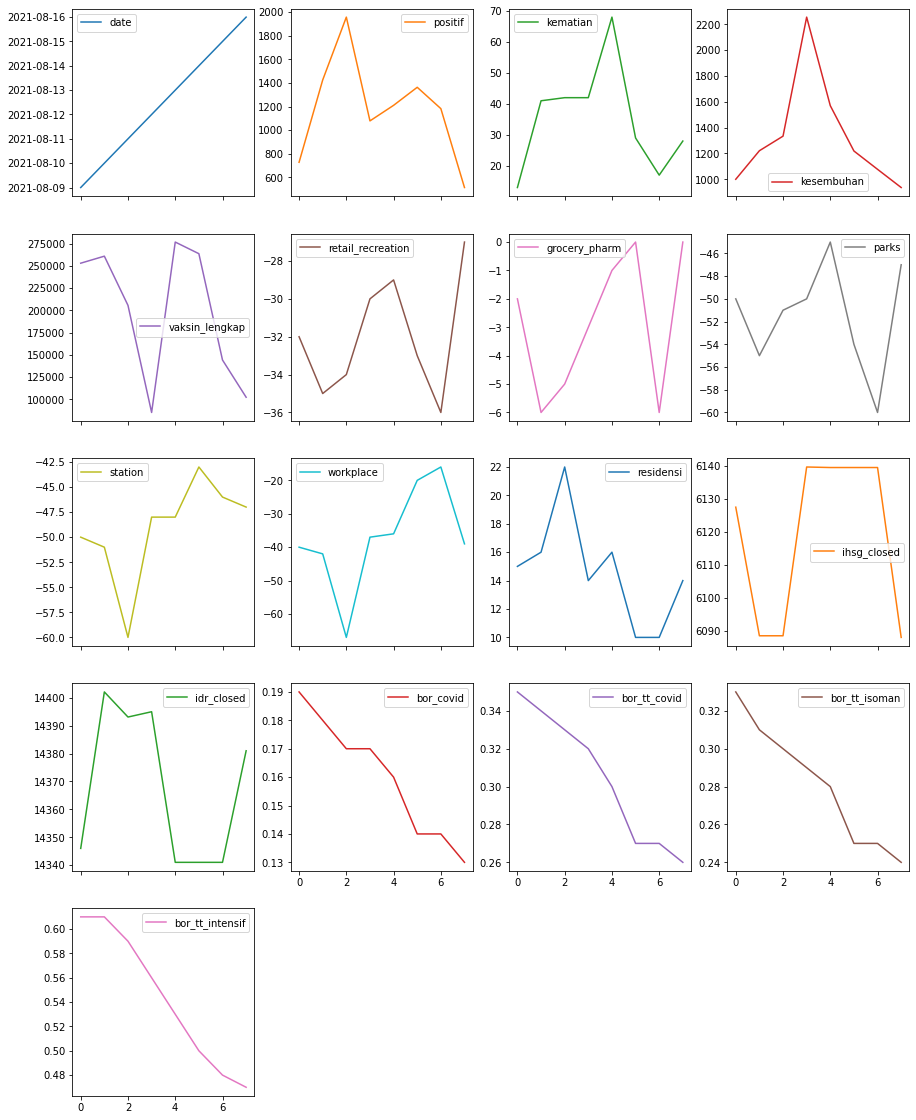

In [25]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-08-09'
end_date = '2021-08-16'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm1 = index_gabungan.loc[mask]
ppkm1.plot(subplots=True, layout=(5,4), figsize=(15,20));

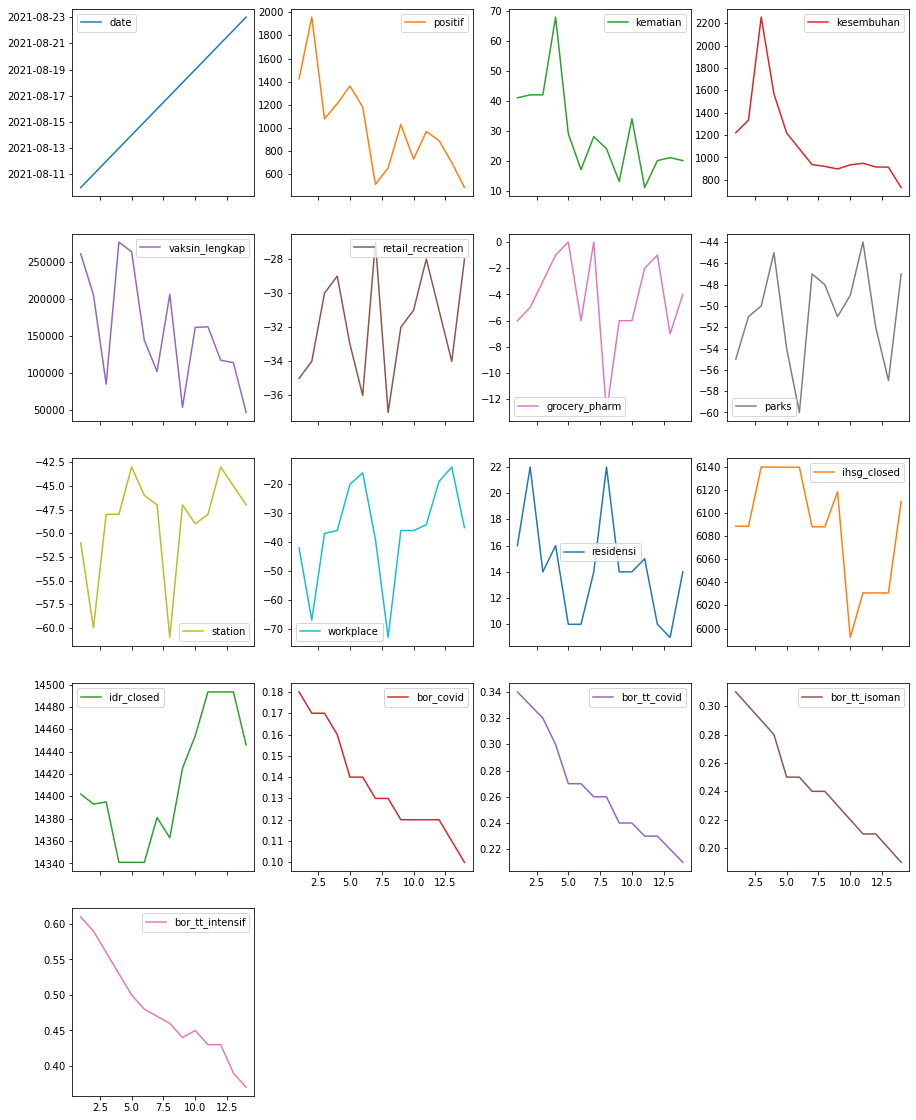

In [26]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-08-10'
end_date = '2021-08-23'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm2 = index_gabungan.loc[mask]
ppkm2.plot(subplots=True, layout=(5,4), figsize=(15,20));

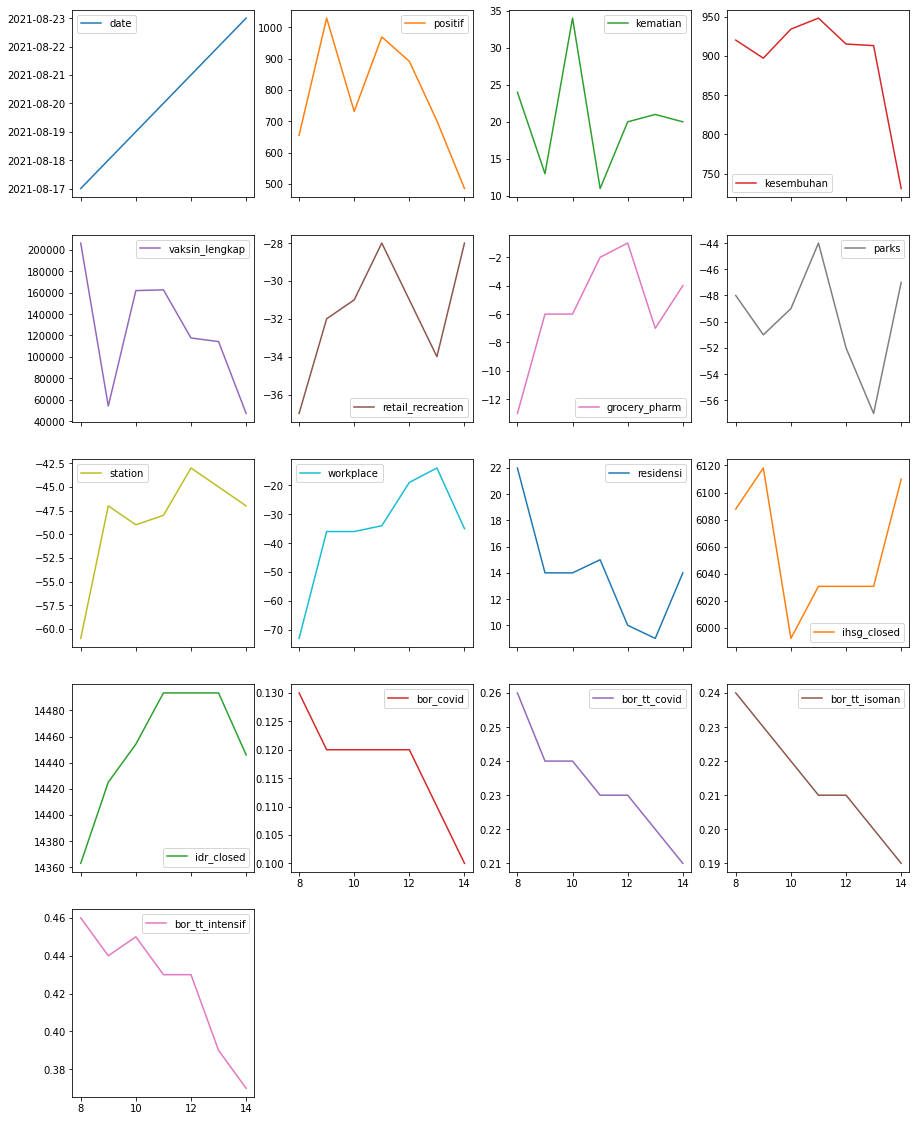

In [27]:
# PPKM tanggal 17 - 23 agustus
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-08-17'
end_date = '2021-08-23'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm3 = index_gabungan.loc[mask]
ppkm3.plot(subplots=True, layout=(5,4), figsize=(15,20));

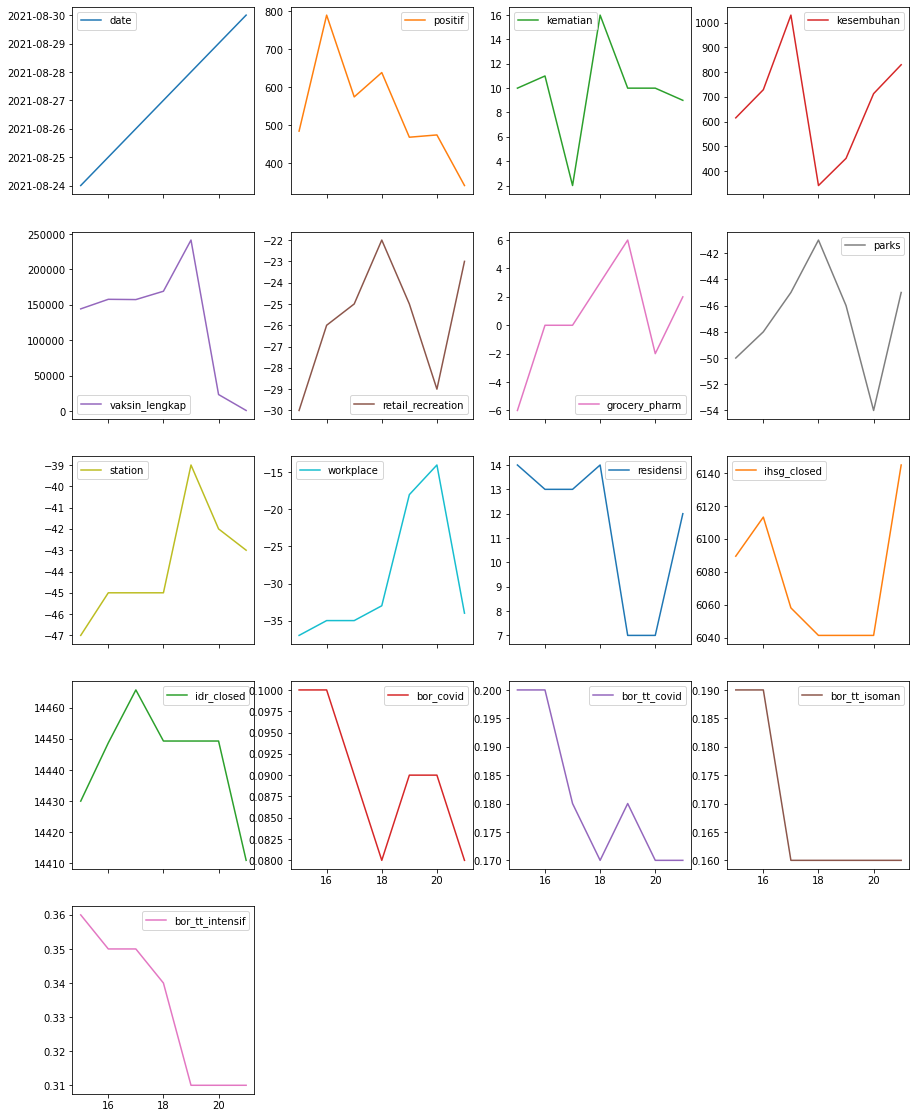

In [28]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-08-24'
end_date = '2021-08-30'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm4 = index_gabungan.loc[mask]
ppkm4.plot(subplots=True, layout=(5,4), figsize=(15,20));

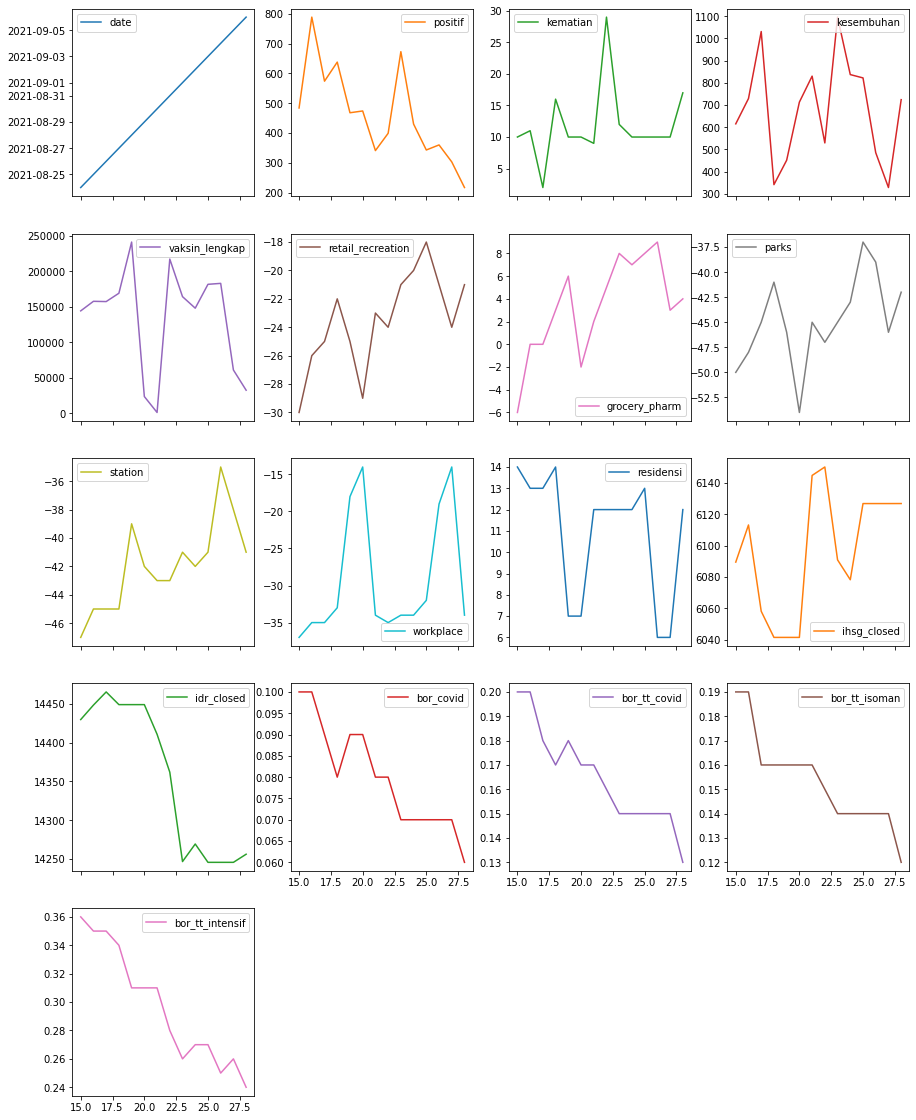

In [29]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-08-24'
end_date = '2021-09-06'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm5 = index_gabungan.loc[mask]
ppkm5.plot(subplots=True, layout=(5,4), figsize=(15,20));

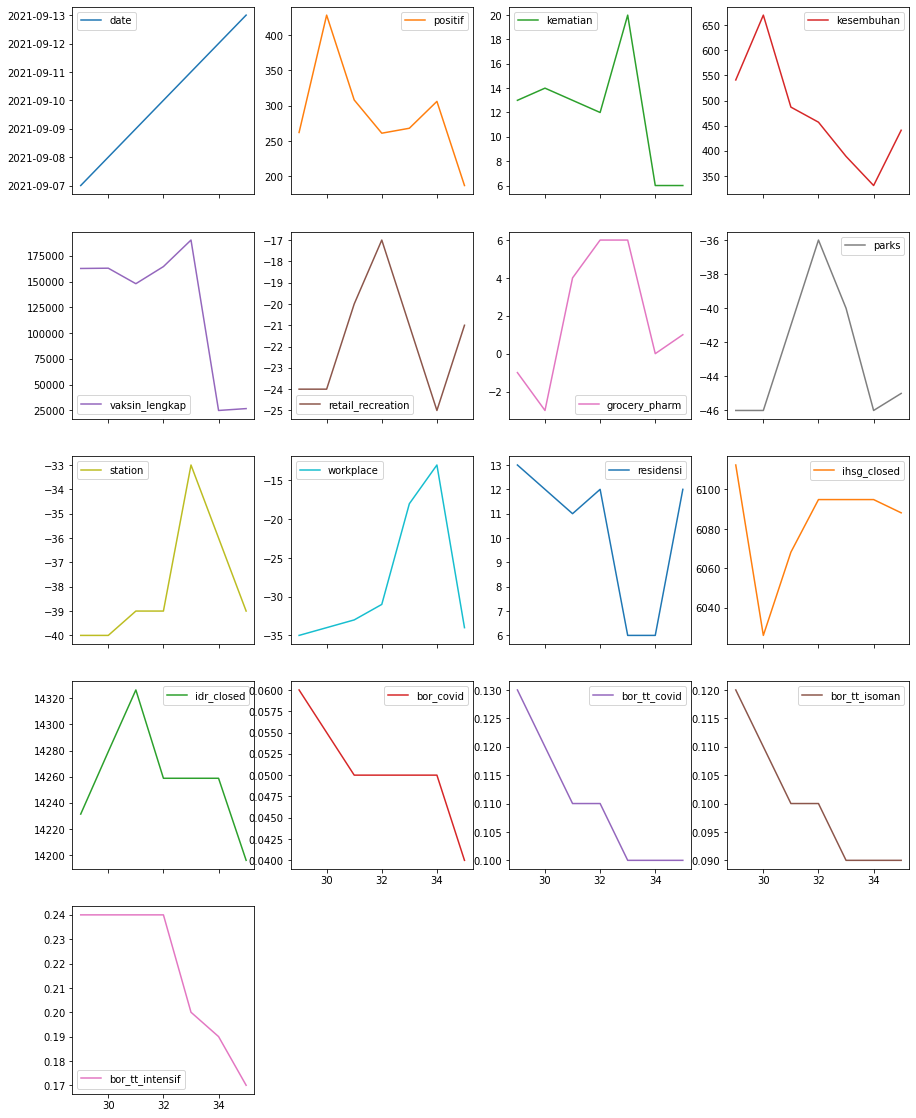

In [30]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-09-07'
end_date = '2021-09-13'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm6 = index_gabungan.loc[mask]
ppkm6.plot(subplots=True, layout=(5,4), figsize=(15,20));

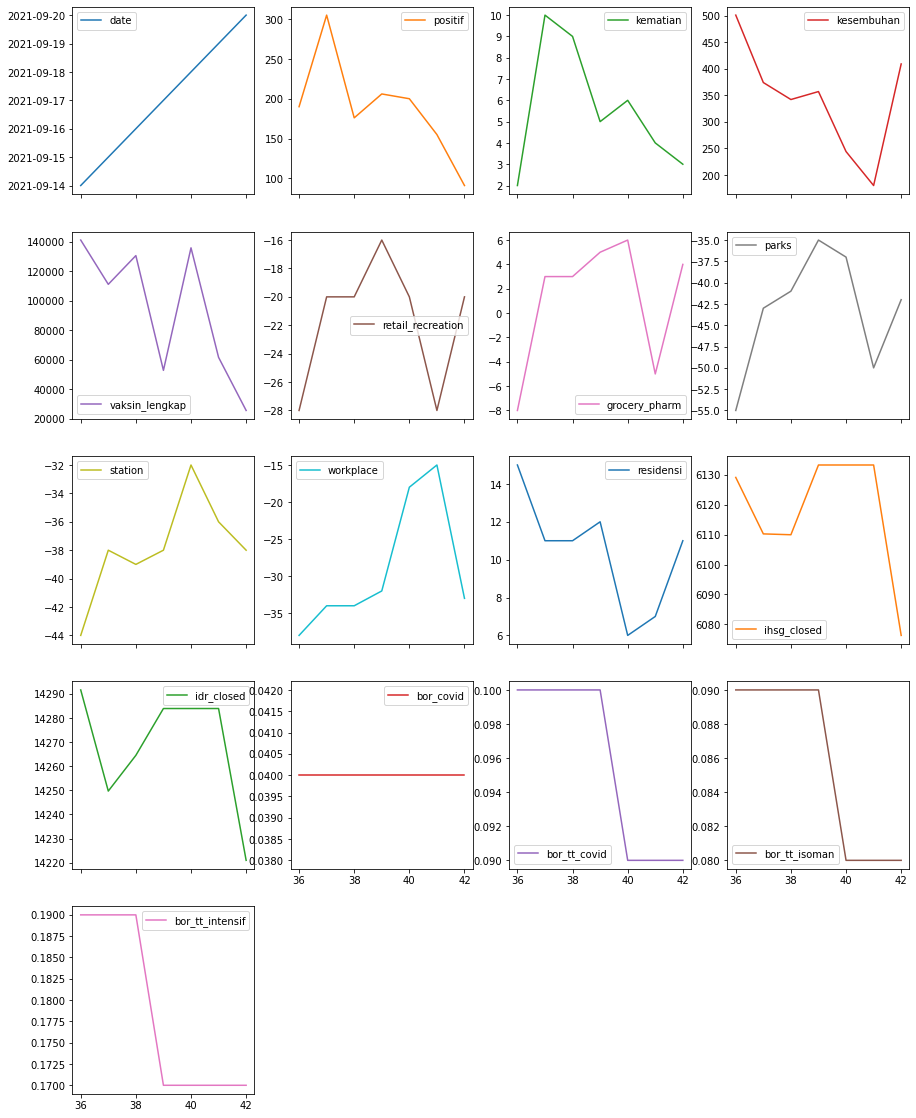

In [31]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-09-14'
end_date = '2021-09-20'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm7 = index_gabungan.loc[mask]
ppkm7.plot(subplots=True, layout=(5,4), figsize=(15,20));

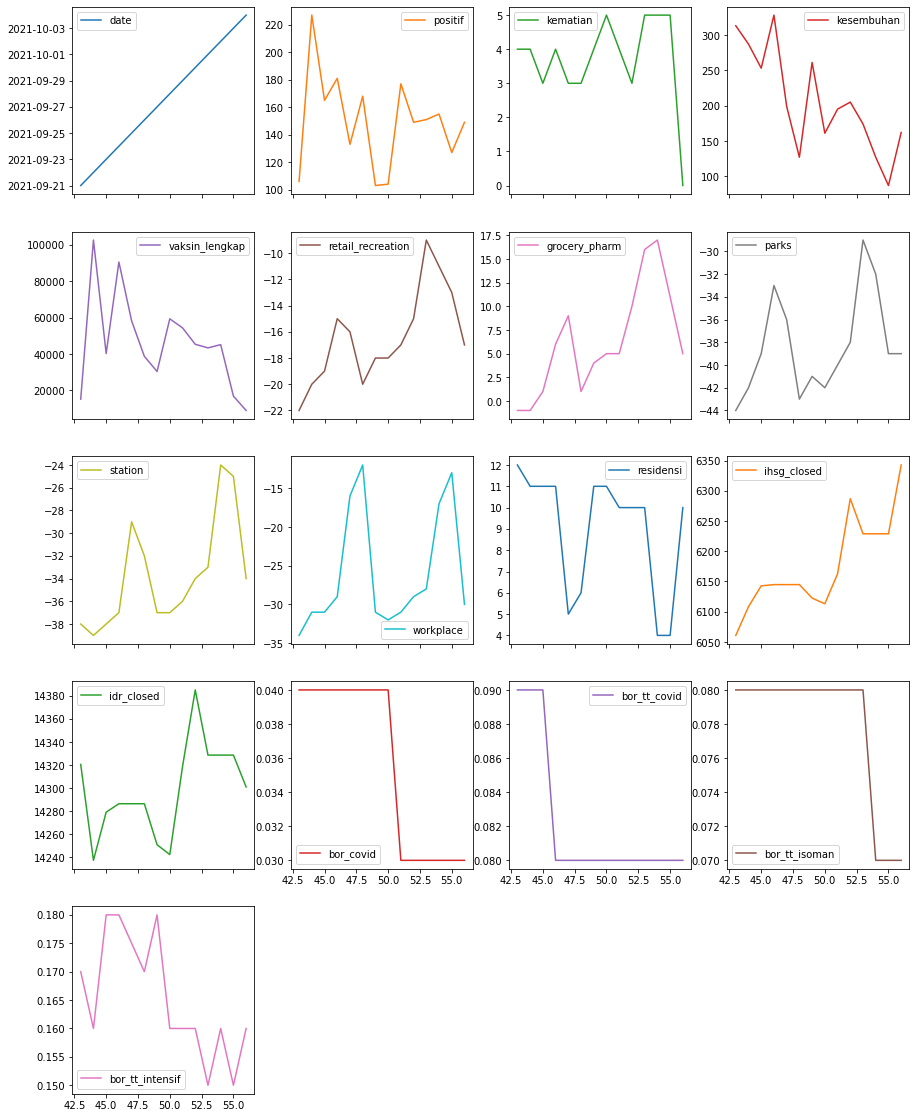

In [32]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-09-21'
end_date = '2021-10-04'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm8 = index_gabungan.loc[mask]
ppkm8.plot(subplots=True, layout=(5,4), figsize=(15,20));

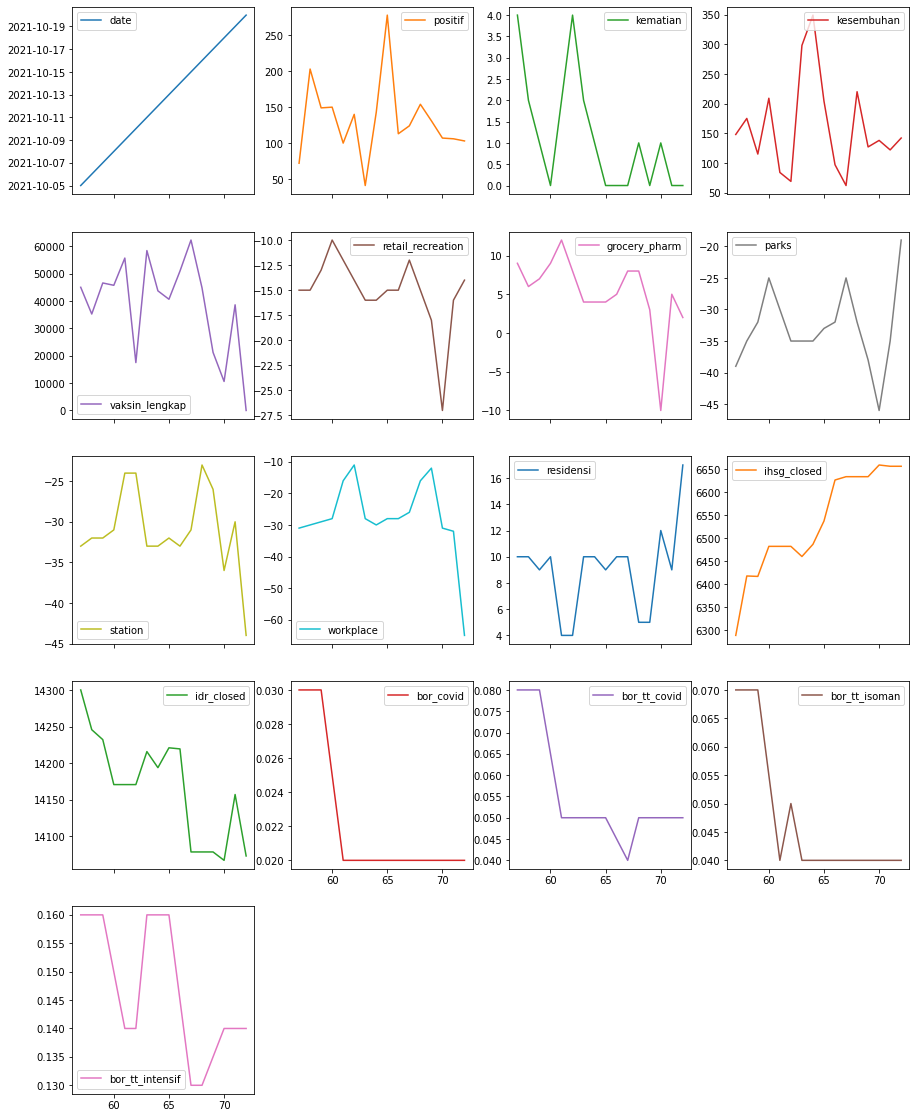

In [33]:
# melakukan sortir tanggal pada data vaksinasi
index_gabungan['date'] = pd.to_datetime(index_gabungan['date'])
start_date = '2021-10-05'
end_date = '2021-10-20'
mask = (index_gabungan['date'] >= start_date) & (index_gabungan['date'] <= end_date)
ppkm9 = index_gabungan.loc[mask]
ppkm9.plot(subplots=True, layout=(5,4), figsize=(15,20));

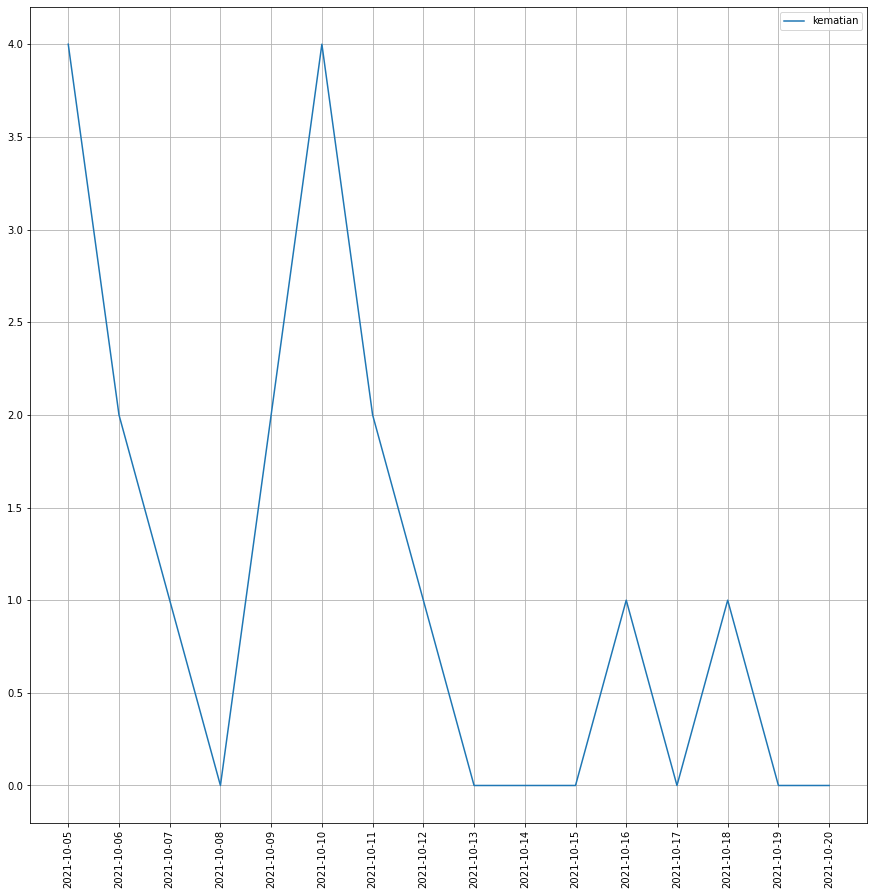

In [34]:
plt.figure(figsize=(15,15))
plt.plot(ppkm9['date'], ppkm9['kematian'],label='kematian')
plt.xticks(ppkm9['date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

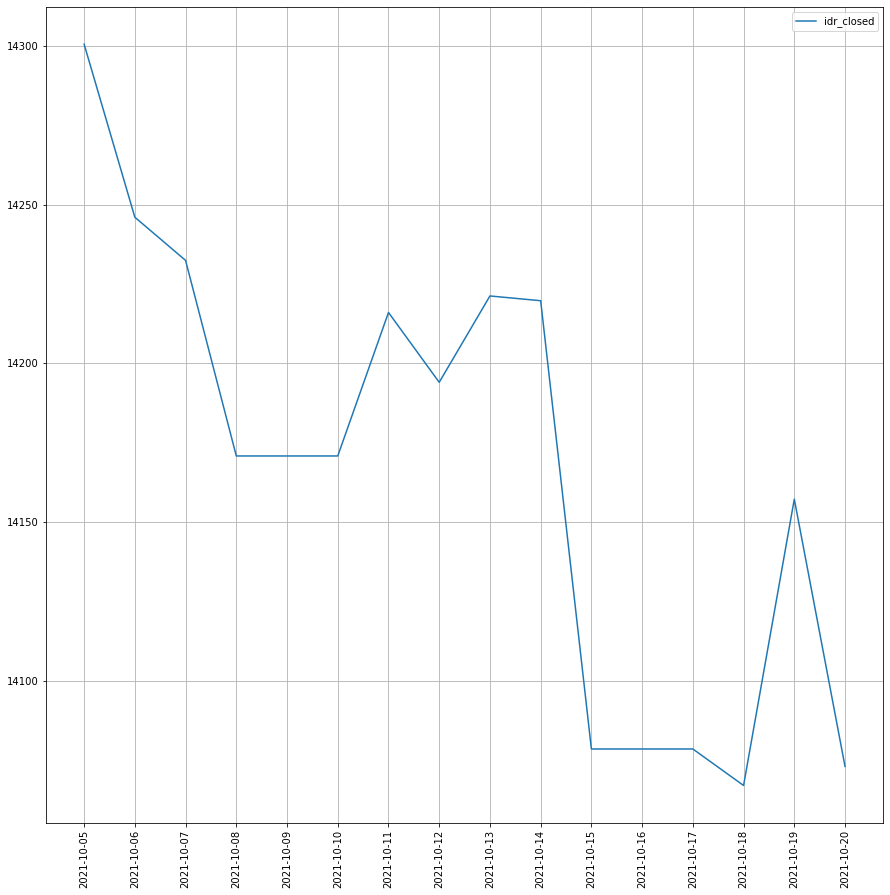

In [35]:
plt.figure(figsize=(15,15))
plt.plot(ppkm9['date'], ppkm9['idr_closed'],label='idr_closed')
plt.xticks(ppkm9['date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

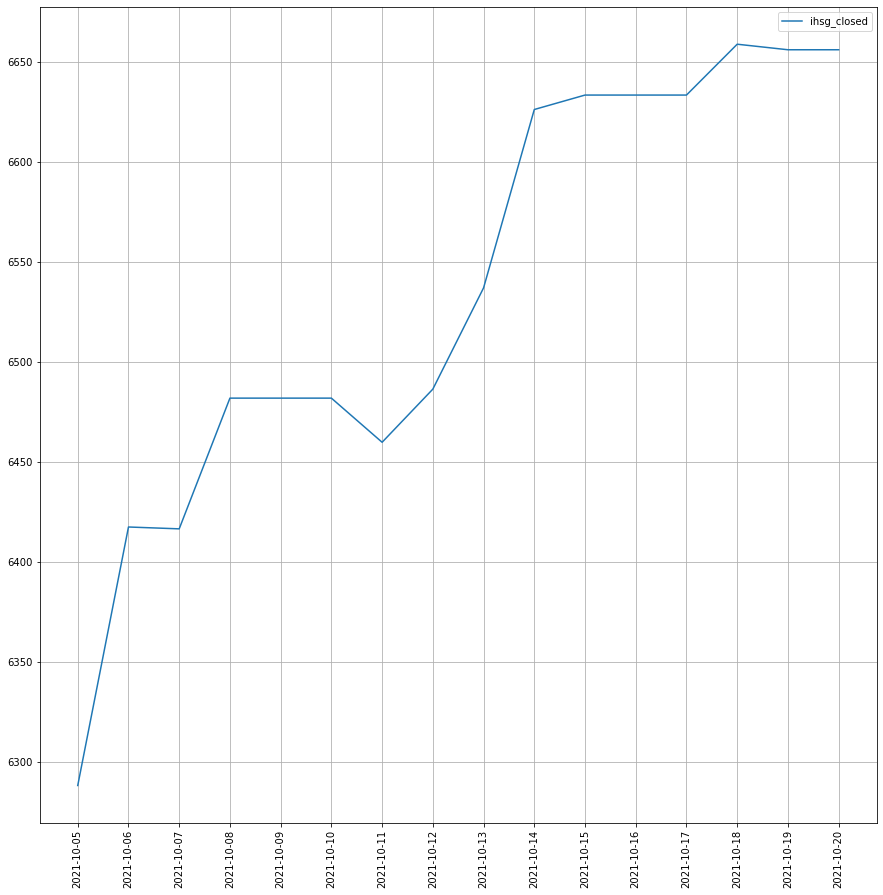

In [36]:
plt.figure(figsize=(15,15))
plt.plot(ppkm9['date'], ppkm9['ihsg_closed'],label='ihsg_closed')
plt.xticks(ppkm9['date'],rotation=90)
plt.legend(loc ="upper right")
plt.grid(True)
plt.show()

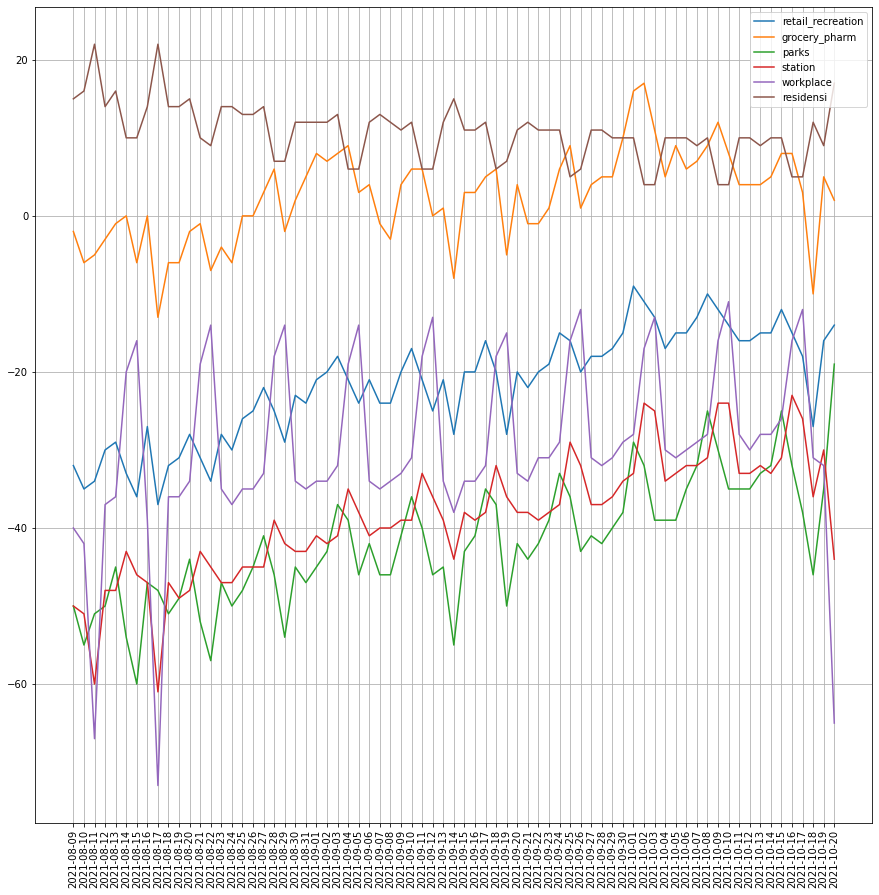

In [37]:
# melakukan sortir tanggal pada data vaksinasi
# values = range(10)
# dates = [datetime.now()-timedelta(days=_) for _ in range(10)]

# fig,ax = plt.subplots()
plt.figure(figsize=(15,15))
plt.plot(index_gabungan['date'], index_gabungan[['retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi']])
plt.xticks(index_gabungan['date'],rotation=90)
plt.legend(['retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi'], loc ="upper right")
plt.grid(True)
plt.show()

# Corr data dengan heatmap

<AxesSubplot:>

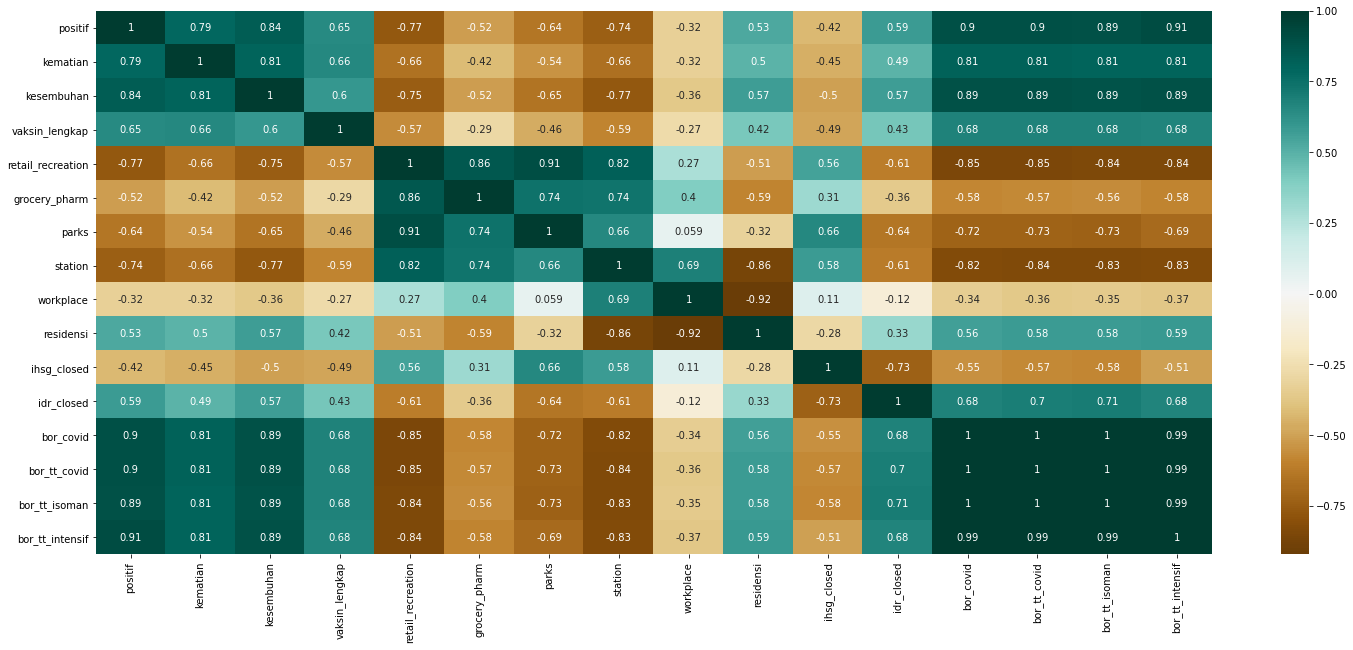

In [38]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(index_gabungan.corr(), center=0, cmap='BrBG', annot=True)

In [39]:
# index_gabungan['positif'].plot.box(figsize=(15,15))
# col = ['date','positif','kematian','kesembuhan','aktif','perawatan','isolasi',
#               'vaksin_lengkap','retail_recreation','grocery_pharm','parks','station','workplace',
#               'residensi','ihsg_closed','idr_closed','bor_covid','bor_tt_covid','bor_tt_isoman',
#               'bor_tt_intensif']


In [40]:
# #find absolute value of z-score for each observation
# z = np.abs(stats.zscore(index_gabungan.loc[:, 'positif':'idr_closed']))

# #only keep rows in dataframe with all z-scores less than absolute value of 3 
# data_clean = index_gabungan[(z<3).all(axis=1)]

# #find how many rows are left in the dataframe 
# # data_clean

# # (99,3)

In [41]:
#find Q1, Q3, and interquartile range for each column
# index_gabungan = index_gabungan.loc[:, 'positif':'bor_tt_intensif']
Q1 = index_gabungan.quantile(q=.25)
Q3 = index_gabungan.quantile(q=.75)
IQR = index_gabungan.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = index_gabungan[~((index_gabungan < (Q1-1.5*IQR)) | (index_gabungan > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

2022-02-08 20:07:41,810 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.
<ipython-input-41-3d50542c4b82>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = index_gabungan[~((index_gabungan < (Q1-1.5*IQR)) | (index_gabungan > (Q3+1.5*IQR))).any(axis=1)]
<ipython-input-41-3d50542c4b82>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = index_gabungan[~((index_gabungan < (Q1-1.5*IQR)) | (index_gabungan > (Q3+1.5*IQR))).any(axis=1)]


(48, 17)

<AxesSubplot:>

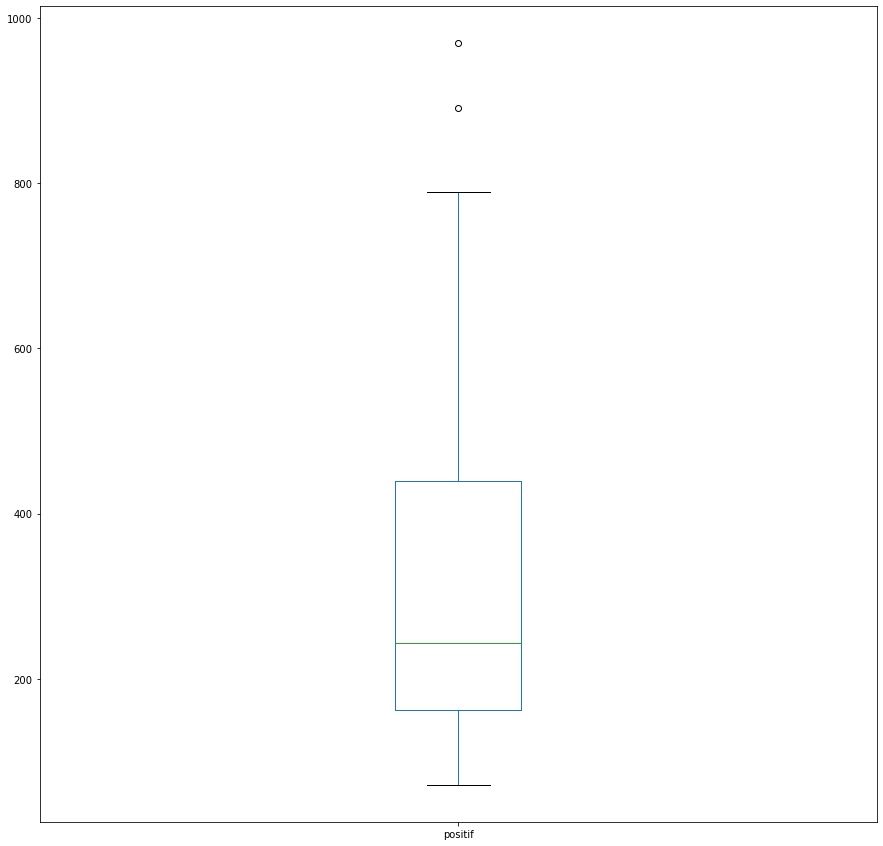

In [42]:
data_clean['positif'].plot.box(figsize=(15,15))

In [43]:
data_clean.loc[:, 'positif':'idr_closed'].describe()
# index_gabungan.loc[:, 'positif':'idr_closed'].describe()

positif   kematian   kesembuhan  vaksin_lengkap  retail_recreation  \
count   48.000000  48.000000    48.000000       48.000000          48.000000   
mean   320.000000   8.625000   465.791667    93312.312500         -21.229167   
std    218.706059   6.194112   282.424229    62473.009819           5.264249   
min     72.000000   0.000000    87.000000     1102.000000         -34.000000   
25%    162.500000   4.000000   234.250000    39818.250000         -25.000000   
50%    244.000000   7.500000   381.500000    76076.000000         -20.500000   
75%    439.500000  11.250000   715.750000   150452.250000         -17.750000   
max    969.000000  28.000000  1096.000000   241345.000000          -9.000000   

       grocery_pharm      parks    station  workplace  residensi  ihsg_closed  \
count      48.000000  48.000000  48.000000  48.000000  48.000000    48.000000   
mean        2.958333 -42.541667 -38.562500 -28.187500  10.395833  6130.310415   
std         4.967804   5.849016   5.069333   8.138838   2.818930    89.608040   
min        -8.000000 -57.000000 -48.000000 -39.000000   4.000000  6026.020020   
25%        -0.250000 -46.000000 -42.000000 -34.000000   9.000000  6085.492065   
50%         3.500000 -42.000000 -38.500000 -31.000000  11.000000  6112.755859   
75%         6.000000 -39.000000 -35.750000 -19.000000  12.000000  6143.237671   
max        16.000000 -29.000000 -25.000000 -12.000000  15.000000  6417.323242   

         idr_closed  
count     48.000000  
mean   14317.447957  
std       85.815728  
min    14196.000000  
25%    14250.675049  
50%    14285.200195  
75%    14382.000000  
max    14493.400391

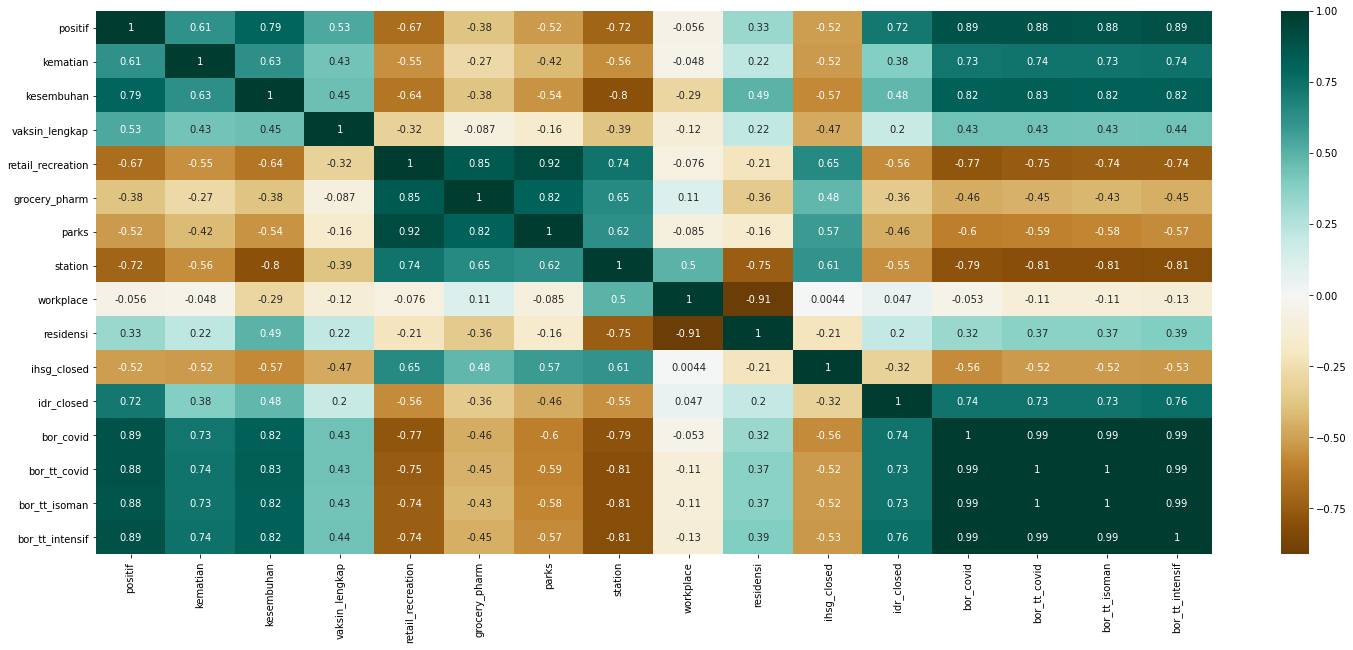

In [44]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(data_clean.corr(), center=0, cmap='BrBG', annot=True);

In [45]:
endog = data_clean.loc[:, 'positif':'idr_closed']
mod = sm.tsa.DynamicFactor(endog,k_factors=1,factor_order=2)
initial_res = mod.fit(method='powell', disp=True)
res = mod.fit(initial_res.params, disp=False)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Optimization terminated successfully.
         Current function value: 61.094901
         Iterations: 9
         Function evaluations: 2699


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
print(res.summary(separate_params=False))

                                                                                                      Statespace Model Results                                                                                                      
Dep. Variable:     ['positif', 'kematian', 'kesembuhan', 'vaksin_lengkap', 'retail_recreation', 'grocery_pharm', 'parks', 'station', 'workplace', 'residensi', 'ihsg_closed', 'idr_closed']   No. Observations:                   48
Model:                                                                                                                                                    DynamicFactor(factors=1, order=2)   Log Likelihood               -2932.470
Date:                                                                                                                                                                      Tue, 08 Feb 2022   AIC                           5916.939
Time:                                                                               

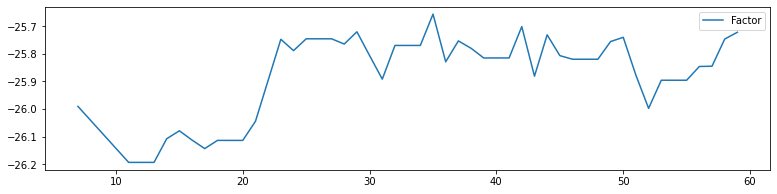

In [47]:
# faktor analisis
fig, ax = plt.subplots(figsize=(13,3))

dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()

In [48]:
# 0 positif,
# 1 kematian
# 2 kesembuhan
# 3 retail_recreation
# 4 grocery_pharm
# 5 parks
# 6 station
# 7 workplace
# 8 residensi
# 9 ihsg_closed
# 10 idr_closed

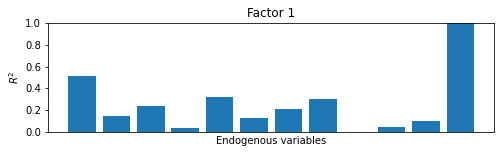

In [49]:
res.plot_coefficients_of_determination(figsize=(8,2));

In [50]:
# 7,4,2,6,0
feature_names = ['positif','kesembuhan',
              'vaksin_lengkap','retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi','ihsg_closed','idr_closed']
dep_var = data_clean[feature_names]
X_raw = dep_var.to_numpy()

n_dim = len(X_raw[0])
n_dim

11

In [51]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=n_dim, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2022-02-08 20:08:14,101 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████|1000/1000, best_cost=4.32e-5
2022-02-08 20:08:17,995 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.3175056934160016e-05, best pos: [-2.11671425e-04  1.38947725e-04 -2.75153693e-03  6.39514236e-04
  5.06607034e-03  6.73264935e-04  1.49576730e-03  1.81967179e-04
 -2.46438118e-03  8.15534116e-04  6.28889888e-05]


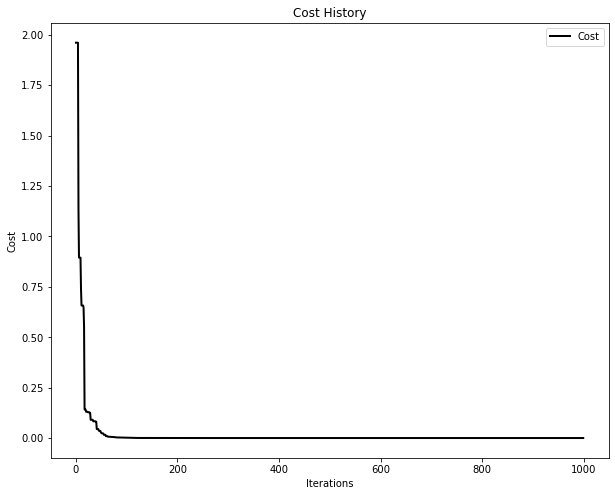

In [52]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [53]:
X = X_raw[:,pos>0]
y = data_clean['kematian']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40, test_size = 0.3)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [55]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [56]:
regr.score(X_train,y_train)

0.6667244907237548

In [57]:
r_sqr = res.coefficients_of_determination
r = []
for i in(range(len(r_sqr))):
  sqr_raw = r_sqr[i]
  r_raw = r_sqr[i]**0.5
  r.append([r_raw[0],sqr_raw[0]])

df_r = pd.DataFrame(r,columns=['r','r_sqr (Coef of Det)'])
df_r


r  r_sqr (Coef of Det)
0   0.717836             0.515289
1   0.383260             0.146888
2   0.483913             0.234172
3   0.195310             0.038146
4   0.564742             0.318934
5   0.356020             0.126750
6   0.461910             0.213361
7   0.550378             0.302916
8   0.047042             0.002213
9   0.202265             0.040911
10  0.320745             0.102877
11  1.000000             1.000000

In [58]:
x=data_clean[['positif','kesembuhan',
              'vaksin_lengkap','retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi','ihsg_closed','idr_closed']].values.reshape(-1,11) #reshape sesuai dengan jumlah variable X
x

array([[ 5.13000000e+02,  9.36000000e+02,  1.02443000e+05,
        -2.70000000e+01,  0.00000000e+00, -4.70000000e+01,
        -4.70000000e+01, -3.90000000e+01,  1.40000000e+01,
         6.08791309e+03,  1.43810000e+04],
       [ 9.69000000e+02,  9.48000000e+02,  1.62576000e+05,
        -2.80000000e+01, -2.00000000e+00, -4.40000000e+01,
        -4.80000000e+01, -3.40000000e+01,  1.50000000e+01,
         6.03077197e+03,  1.44934004e+04],
       [ 8.91000000e+02,  9.15000000e+02,  1.17599000e+05,
        -3.10000000e+01, -1.00000000e+00, -5.20000000e+01,
        -4.30000000e+01, -1.90000000e+01,  1.00000000e+01,
         6.03077197e+03,  1.44934004e+04],
       [ 7.01000000e+02,  9.13000000e+02,  1.14266000e+05,
        -3.40000000e+01, -7.00000000e+00, -5.70000000e+01,
        -4.50000000e+01, -1.40000000e+01,  9.00000000e+00,
         6.03077197e+03,  1.44934004e+04],
       [ 4.85000000e+02,  7.31000000e+02,  4.71150000e+04,
        -2.80000000e+01, -4.00000000e+00, -4.70000000e+01,
  

In [59]:
# 'positif','kesembuhan','retail_recreation','grocery_pharm','parks','station','workplace',
# #               'residensi','ihsg_closed','idr_closed'

In [60]:
y=data_clean[['kematian']]

In [61]:
cross_val_score(regr, X_train, y_train, cv=3)

array([ 0.16721039,  0.54823837, -0.31865237])

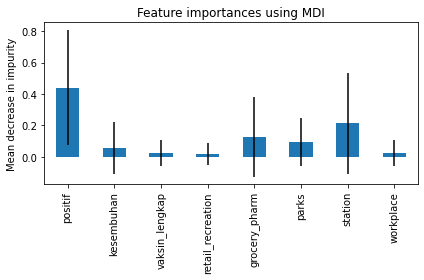

In [64]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names[0:8])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [65]:
fig = px.scatter(data_clean, x=data_clean['workplace'], y=data_clean['kematian'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Workplace vs Tingkat Kematian", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [66]:
y_pred = regr.predict(X_test)
y_pred

array([ 2.49816309,  6.66395474,  3.95700611,  3.84649818,  9.4297429 ,
        9.5519588 ,  9.86025226,  9.51289929, 11.85262552,  7.87816961,
        6.37126962, 11.2987491 ,  8.68046627,  3.68113362, 10.25567631])

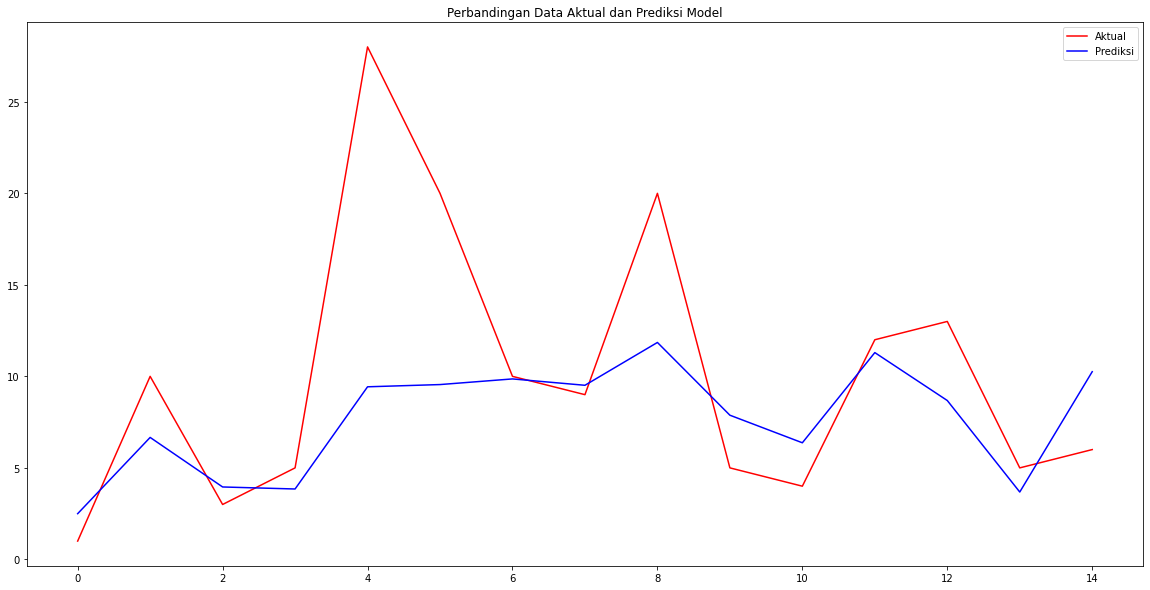

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, color = 'red', label = 'Aktual')
plt.plot(y_pred, color = 'blue', label = 'Prediksi')
plt.title('Perbandingan Data Aktual dan Prediksi Model')
plt.legend()
plt.show()

In [70]:
positif = 1000
kesembuhan = 1000
vaksin_lengkap = 100000
retail_recreation = 40
grocery_pharm = -50
parks = -30
station = -30
workplace = -30

# ,retail_recreation,grocery_pharm,parks,station,workplace
data = [positif,kesembuhan,vaksin_lengkap,retail_recreation,grocery_pharm,parks,station,workplace]
prediksi_kematian = regr.predict([data])

print('Prediksi Angka Kematian = '+str(round(prediksi_kematian[0],0))+' orang')

Prediksi Angka Kematian = 11.0 orang


In [71]:
olsmod = sm.OLS(y, x).fit()
print(olsmod.summary())

                                 OLS Regression Results                                
Dep. Variable:               kematian   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              17.77
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    1.46e-11
Time:                        20:11:24   Log-Likelihood:                         -137.24
No. Observations:                  48   AIC:                                      296.5
Df Residuals:                      37   BIC:                                      317.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.8408301129042031


In [73]:
# uji F
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 17.76872997153574
Probability of observing value at least as high as F-statistic: 1.4640645464164072e-11


In [74]:
# uji t
print(olsmod.pvalues)

x1     0.938998
x2     0.542673
x3     0.869235
x4     0.088430
x5     0.103162
x6     0.330689
x7     0.985318
x8     0.895373
x9     0.889607
x10    0.624584
x11    0.794039
dtype: float64


In [75]:
# uji asumsi
data_clean['kematian_pred'] = olsmod.predict(x)
data_clean['residual'] = olsmod.resid
data_clean.head()

<ipython-input-75-bd0b6756647f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-bd0b6756647f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  positif  kematian  kesembuhan  vaksin_lengkap  \
7  2021-08-16      513        28         936          102443   
11 2021-08-20      969        11         948          162576   
12 2021-08-21      891        20         915          117599   
13 2021-08-22      701        21         913          114266   
14 2021-08-23      485        20         731           47115   

    retail_recreation  grocery_pharm  parks  station  workplace  residensi  \
7                 -27              0    -47      -47        -39         14   
11                -28             -2    -44      -48        -34         15   
12                -31             -1    -52      -43        -19         10   
13                -34             -7    -57      -45        -14          9   
14                -28             -4    -47      -47        -35         14   

    ihsg_closed    idr_closed  bor_covid  bor_tt_covid  bor_tt_isoman  \
7   6087.913086  14381.000000       0.13          0.26           0.24   
11  6030.771973  14493.400391       0.12          0.23           0.21   
12  6030.771973  14493.400391       0.12          0.23           0.21   
13  6030.771973  14493.400391       0.11          0.22           0.20   
14  6109.828125  14446.000000       0.10          0.21           0.19   

    bor_tt_intensif  kematian_pred   residual  
7              0.47      16.007721  11.992279  
11             0.43      17.333919  -6.333919  
12             0.43      17.784458   2.215542  
13             0.39      15.330725   5.669275  
14             0.37      13.285887   6.714113

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



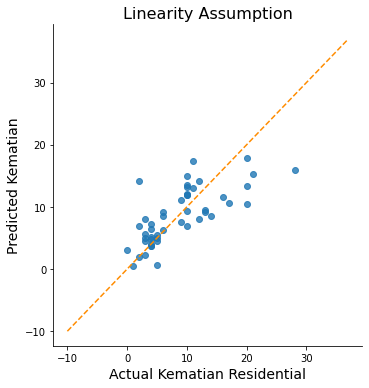

In [76]:
# linearitas
# Plotting the observed vs predicted values
sns.lmplot(x='kematian', y='kematian_pred', data=data_clean, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(data_clean[['kematian', 'kematian_pred']].min().min()-10, 
                        data_clean[['kematian', 'kematian_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Kematian', fontsize=14)
plt.xlabel('Actual Kematian Residential', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.03207585705774025


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



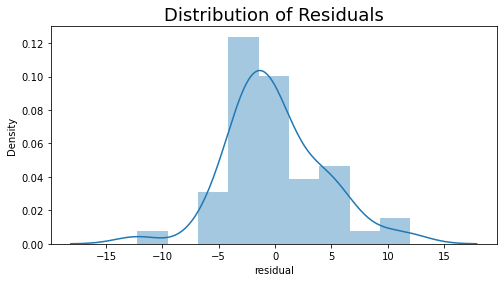

Residuals are not normally distributed


In [77]:
# normalitas
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(data_clean['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(data_clean['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Pearson correlation coefficient matrix of each variables:
                     positif  kesembuhan  retail_recreation  grocery_pharm  \
positif            1.000000    0.793031          -0.674266      -0.383100   
kesembuhan         0.793031    1.000000          -0.642230      -0.384539   
retail_recreation -0.674266   -0.642230           1.000000       0.850634   
grocery_pharm     -0.383100   -0.384539           0.850634       1.000000   
parks             -0.518785   -0.541379           0.922524       0.820050   
station           -0.717060   -0.798865           0.738139       0.651285   
workplace         -0.055833   -0.288490          -0.075514       0.111363   
residensi          0.326784    0.492138          -0.213125      -0.355841   
ihsg_closed       -0.515270   -0.571475           0.651020       0.482066   
idr_closed         0.717836    0.483913          -0.564742      -0.356020   

                      parks   station  workplace  residensi  ihsg_closed  \
positif          

<ipython-input-78-40cc7e56b2b7>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



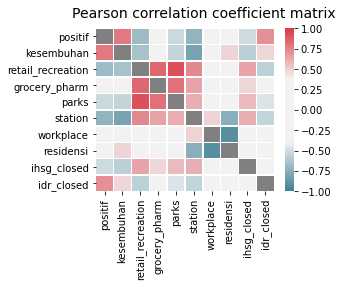

In [78]:
# multikolinearitas
corr = data_clean[[ 'positif','kesembuhan','retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi','ihsg_closed','idr_closed']].corr()

print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()



In [79]:
X_variables = data_clean[['positif','kesembuhan',
              'vaksin_lengkap','retail_recreation','grocery_pharm','parks','station','workplace',
              'residensi','ihsg_closed','idr_closed']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

feature           VIF
0             positif     15.250211
1          kesembuhan     18.864220
2      vaksin_lengkap      5.865975
3   retail_recreation    650.421240
4       grocery_pharm     14.847897
5               parks    481.802832
6             station   1289.937780
7           workplace    188.340985
8           residensi    393.789314
9         ihsg_closed  10708.041643
10         idr_closed  13721.509186

In [80]:
# autokorelasi
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(data_clean['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.7390392070433627
Little to no autocorrelation 

Assumption satisfied


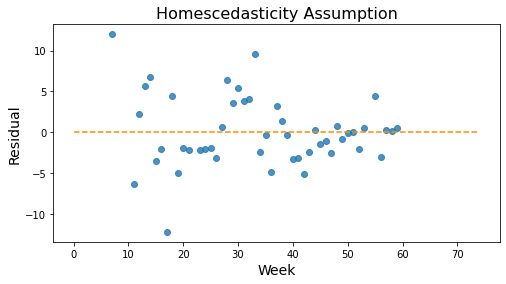

In [81]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=data_clean.index, y=data_clean.residual, alpha=0.8)
plt.plot(np.repeat(0, len(index_gabungan.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

In [ ]:
# # Set independent and dependent variables
# X = data_clean[['positif','idr_closed','grocery_pharm','idr_closed','workplace']]
# y = data_clean['kematian']

# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40, test_size = 0.3)

# X_train = np.asarray(X_train)
# X_test = np.asarray(X_test)
# y_train = np.asarray(y_train)
# y_test = np.asarray(y_test)

# # Initialize model from sklearn and fit it into our data
# regr = linear_model.LinearRegression()
# model = regr.fit(X_train, y_train)

# print('Intercept:', model.intercept_)
# print('Coefficients:', model.coef_)
# print('score',model.score(X_train,y_train))